# Credit Card Fraud Detection - Exploratory Data Analysis

## Overview

This notebook presents a comprehensive exploratory data analysis (EDA) of credit card fraud detection using two distinct datasets:

1. [**Synthetic Financial Fraud Dataset**](https://www.kaggle.com/datasets/aryan208/financial-transactions-dataset-for-fraud-detection/data): 5 million transactions with engineered features
2. [**European Credit Card Dataset**](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023): Real-world anonymized transactions with PCA-transformed features

The analysis aims to understand data characteristics, identify patterns in fraudulent behavior, and guide feature engineering for later machine learning models.

## Contents

1. [Dataset 1: Synthetic Financial Fraud Analysis](#dataset-1)
   - [1.1 Data Loading and Initial Exploration](#data-loading-1)
   - [1.2 Missing Data Analysis](#missing-data-1)
   - [1.3 Class Distribution Analysis](#class-distribution-1)
   - [1.4 Temporal Analysis](#temporal-analysis-1)
   - [1.5 Feature Distribution Analysis](#feature-distribution-1)
   - [1.6 Categorical Features Analysis](#categorical-analysis-1)
   - [1.7 Fraud-Specific Analysis](#fraud-specific-1)
   - [1.8 Correlation Analysis](#correlation-analysis-1)

2. [Dataset 2: European Credit Card Analysis](#dataset-2)
   - [2.1 Data Loading and Initial Exploration](#data-loading-2)
   - [2.2 Missing Data Analysis](#missing-data-2)
   - [2.3 Class Distribution Analysis](#class-distribution-2)
   - [2.4 Amount Analysis](#amount-analysis-2)
   - [2.5 PCA Features Distribution](#pca-distribution-2)

<br/>
<br/>

<h2 id="dataset-1">Dataset 1: Synthetic Financial Fraud Analysis</h2>

<h3 id="data-loading-1">1.1 Data Loading and Initial Exploration</h3>

In [12]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pointbiserialr

# set plotting style
plt.style.use('default')
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_synthetic = pd.read_csv('data/financial_fraud_detection_dataset.csv')

In [4]:
print(f"Rows, Columns: {df_synthetic.shape}")
df_synthetic.head()

Rows, Columns: (5000000, 18)


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [5]:
# features and datatypes
df_synthetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

<h3 id="missing-data-1">1.2 Missing Data Analysis</h3>

In [6]:
df_synthetic.isnull().sum()

transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64

In [7]:
df_synthetic.duplicated().sum() # number of duplicate rows

0

In [8]:
# drop columns that are not needed for analysis
df_synthetic.drop(columns=['transaction_id', 'fraud_type', 'time_since_last_transaction'], inplace=True, errors='ignore')

In [9]:
# basic statistics
df_synthetic.describe()

,amount,spending_deviation_score,velocity_score,geo_anomaly_score
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.589343e+02,-3.881160e-04,1.050132e+01,5.000293e-01
std,4.699333e+02,1.000807e+00,5.766842e+00,2.886349e-01
min,1.000000e-02,-5.260000e+00,1.000000e+00,0.000000e+00
25%,2.657000e+01,-6.800000e-01,5.000000e+00,2.500000e-01
50%,1.386700e+02,0.000000e+00,1.100000e+01,5.000000e-01
75%,5.038900e+02,6.700000e-01,1.600000e+01,7.500000e-01
max,3.520570e+03,5.020000e+00,2.000000e+01,1.000000e+00


<h3 id="class-distribution-1">1.3 Class Distribution Analysis</h3>

In [10]:
fraud_counts = df_synthetic['is_fraud'].value_counts()
fraud_percentages = df_synthetic['is_fraud'].value_counts(normalize=True) * 100

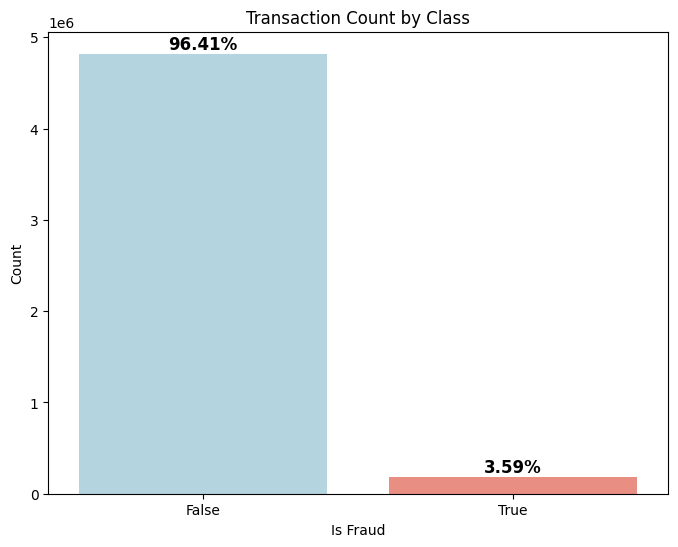

In [ ]:
# count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_synthetic, x='is_fraud', palette=['lightblue', 'salmon'])
ax.set_title('Transaction Count by Class')
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Count')

# add percentage labels
for i, p in enumerate(ax.patches):
    percentage = f'{fraud_percentages.iloc[i]:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height() + 50000),
                ha='center', fontsize=12, weight='bold')

plt.show()

- There is a severe class imbalance with only 3.59% of fraudulent transactions.

<h3 id="temporal-analysis-1">1.4 Temporal Analysis</h3>

In [14]:
# convert timestamp and extract temporal features
df_synthetic['timestamp'] = pd.to_datetime(df_synthetic['timestamp'], errors='coerce')
df_synthetic['month'] = df_synthetic['timestamp'].dt.month
df_synthetic['hour'] = df_synthetic['timestamp'].dt.hour
df_synthetic['day_of_week'] = df_synthetic['timestamp'].dt.dayofweek

In [15]:
monthly_summary = pd.DataFrame({
    'transaction_count': df_synthetic['month'].value_counts().sort_index(),
    'fraud_rate': df_synthetic.groupby('month')['is_fraud'].mean().sort_index()
})

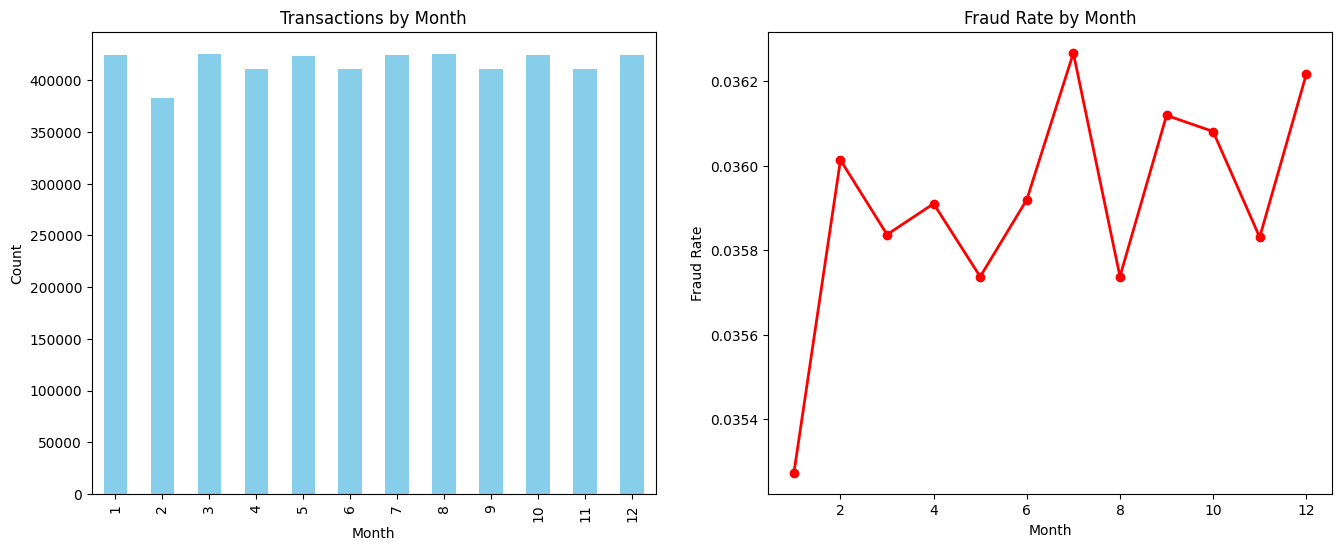

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Monthly Transactions
monthly_summary['transaction_count'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Transactions by Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Count')

# Monthly Fraud Rate
monthly_summary['fraud_rate'].plot(ax=ax[1], marker='o', color='red', linewidth=2)
ax[1].set_title('Fraud Rate by Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Fraud Rate')

plt.show()

- The transactions volume is relatively consistent across the months (380k - >400k per month).
- The monthly fraud rates vary slightly with July showing the highest fraud activity.

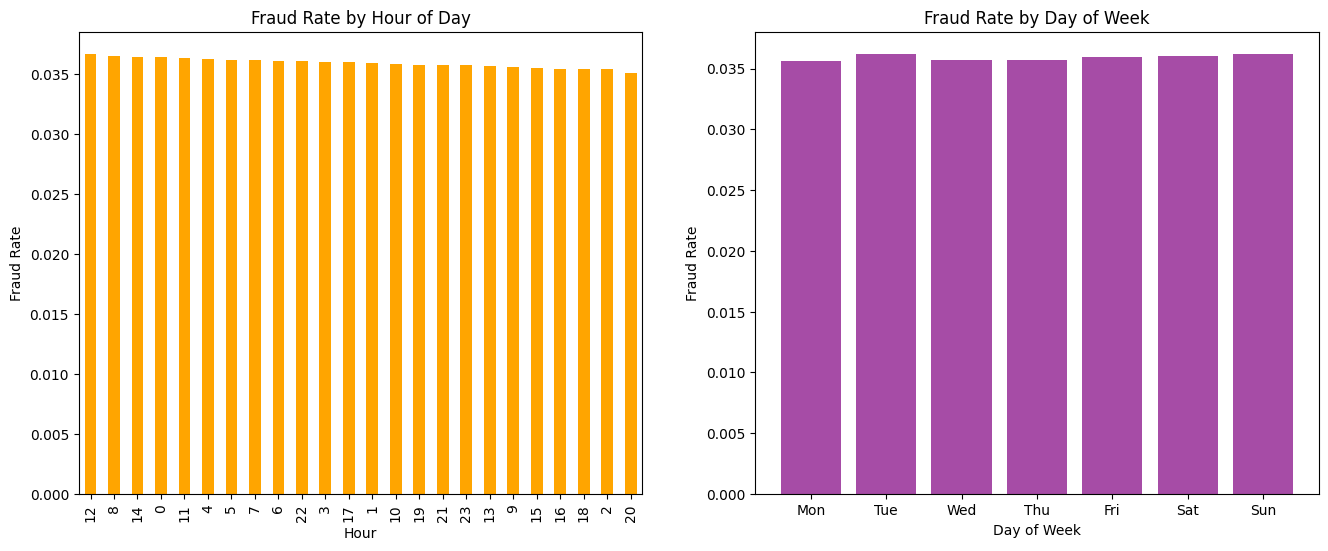

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Hourly Fraud Analysis
hourly_fraud = df_synthetic.groupby('hour')['is_fraud'].mean().sort_values(ascending=False)
hourly_fraud.plot(kind='bar', ax=ax[0], color='orange')
ax[0].set_title('Fraud Rate by Hour of Day')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Fraud Rate')

# Day of Week Fraud Analysis
dow_fraud = df_synthetic.groupby('day_of_week')['is_fraud'].mean()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax[1].bar(range(7), dow_fraud.values, color='purple', alpha=0.7)
ax[1].set_title('Fraud Rate by Day of Week')
ax[1].set_xlabel('Day of Week')
ax[1].set_ylabel('Fraud Rate')
ax[1].set_xticks(range(7))
ax[1].set_xticklabels(dow_labels)

plt.show()

- The fraud rates remain consistent across all hours, showing no significant time period for high risk.

- Theres also a similar uniform distribution across all days which should be becasue of the synthetic natur eof the dataset.

- No relevant time pattern.

<h3 id="feature-distribution-1">1.5 Feature Distribution Analysis</h3>

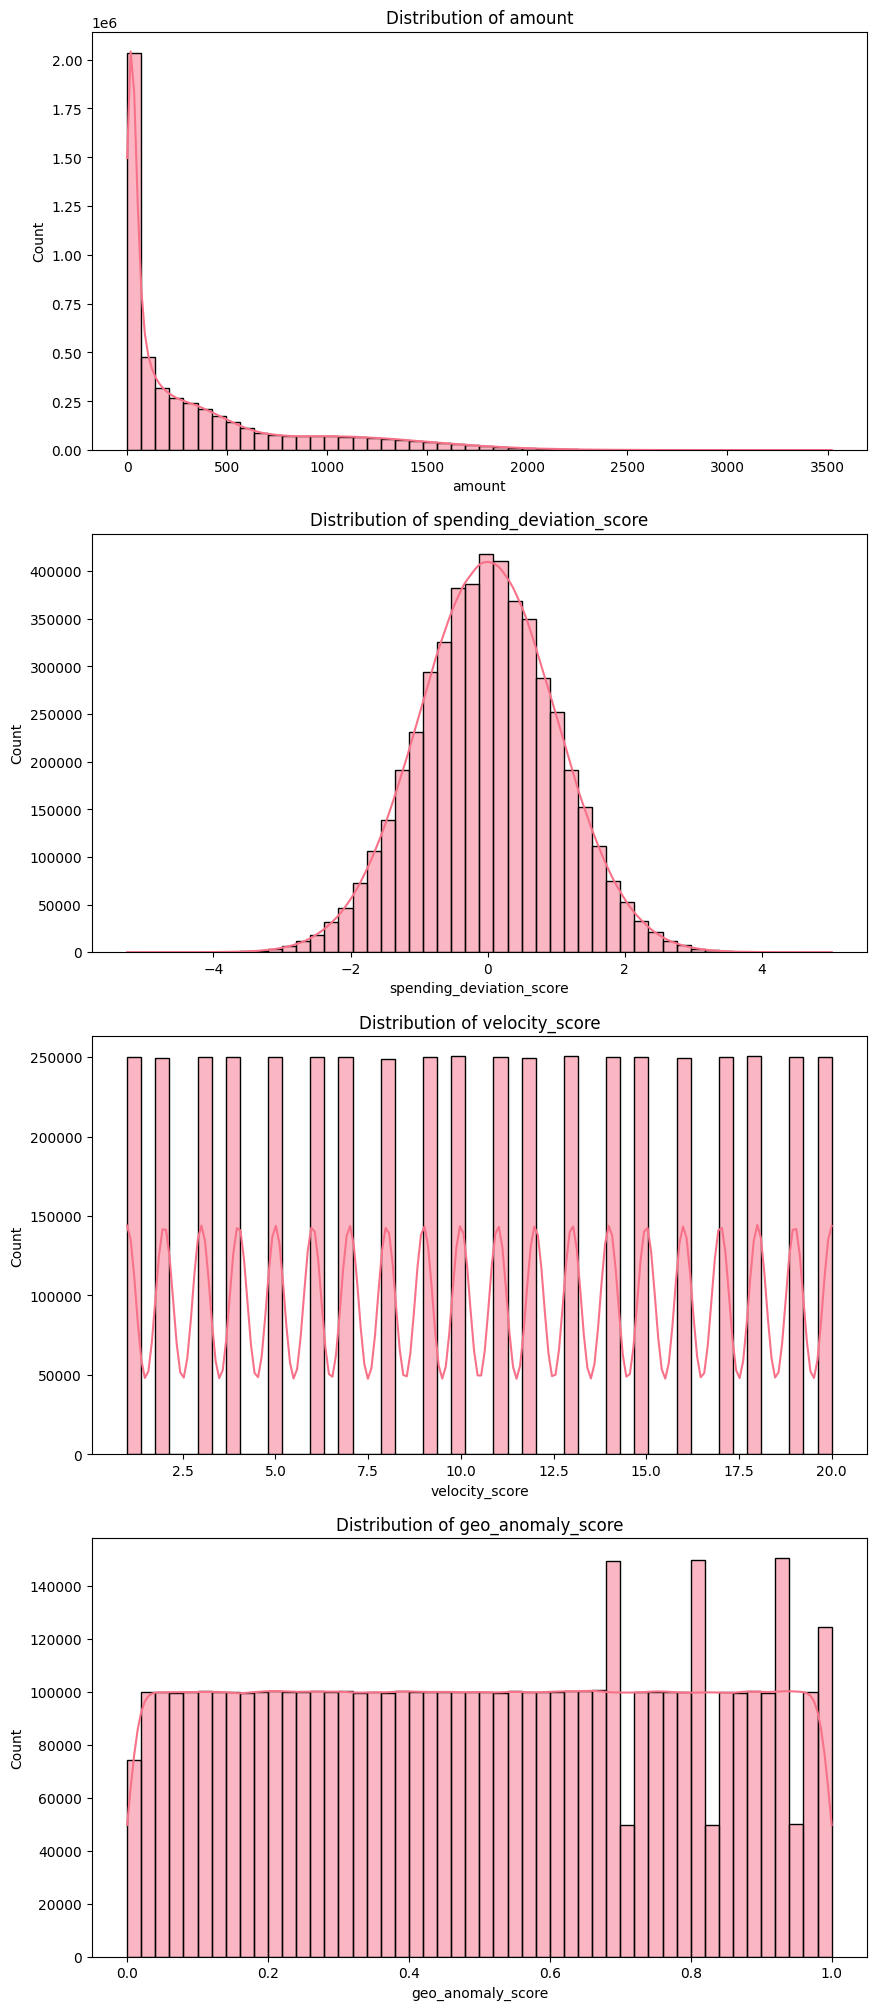

In [18]:
continuous_features = ['amount', 'spending_deviation_score', 'velocity_score', 'geo_anomaly_score']

fig, ax = plt.subplots(4, 1, figsize=(10, 25))
ax = ax.ravel()

for i, feature in enumerate(continuous_features):
    sns.histplot(data=df_synthetic, x=feature, bins=50, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')

plt.show()

- The amount is highly right-skewed, which shows similarity to real financial transactions where there are mostly small amounts.
- The spending deviation score shows a perfect normal distribution.
- The velocity and geo anomaly score show a uniform distribution, which is more typical of artificially generated published display data.
- No meaningful fraud detection signal is provided.

<h3 id="categorical-analysis-1">1.6 Categorical Features Analysis</h3>

In [19]:
categorical_features = ['transaction_type', 'merchant_category', 'location', 'device_used', 'payment_channel']

fraud_analysis = {}
for feature in categorical_features:
    fraud_rates = df_synthetic.groupby(feature)['is_fraud'].agg(['count', 'sum', 'mean']).round(4)
    fraud_rates['fraud_rate'] = fraud_rates['mean']
    fraud_analysis[feature] = fraud_rates.sort_values('fraud_rate', ascending=False)
    
    print(fraud_analysis[feature])

                    count    sum    mean  fraud_rate
transaction_type                                    
transfer          1250334  45328  0.0363      0.0363
withdrawal        1248635  44874  0.0359      0.0359
deposit           1250593  44786  0.0358      0.0358
payment           1250438  44565  0.0356      0.0356
                    count    sum    mean  fraud_rate
merchant_category                                   
entertainment      625332  22573  0.0361      0.0361
other              624589  22556  0.0361      0.0361
grocery            624954  22516  0.0360      0.0360
travel             625656  22503  0.0360      0.0360
online             623581  22324  0.0358      0.0358
restaurant         625483  22367  0.0358      0.0358
retail             626319  22453  0.0358      0.0358
utilities          624086  22261  0.0357      0.0357
            count    sum    mean  fraud_rate
location                                    
London     624256  22478  0.0360      0.0360
Toronto    624349

The categorical features show perfect balance across all categories, indicating synthetic generation:
- Transaction types: Exactly 1.25M transactions each (deposit, payment, transfer, withdrawal)
- Merchant categories: Nearly identical counts across 8 categories (~625K each)  
- Geographic locations: Perfectly balanced across 8 global cities (~625K each)
- Device usage: Equal distribution across 4 device types (1.25M each)
- Payment channels: Uniform distribution across 4 channels (1.25M each)

The fraud rates show minimal variation across all categorical features:
- Fraud rates vary only 0.7 percentage points across all categories
- ATM devices show highest fraud rate (3.62%) and wire transfers (3.60%)
- Entertainment and "other" merchant categories have slightly elevated fraud rates, which aligns with real-world patterns

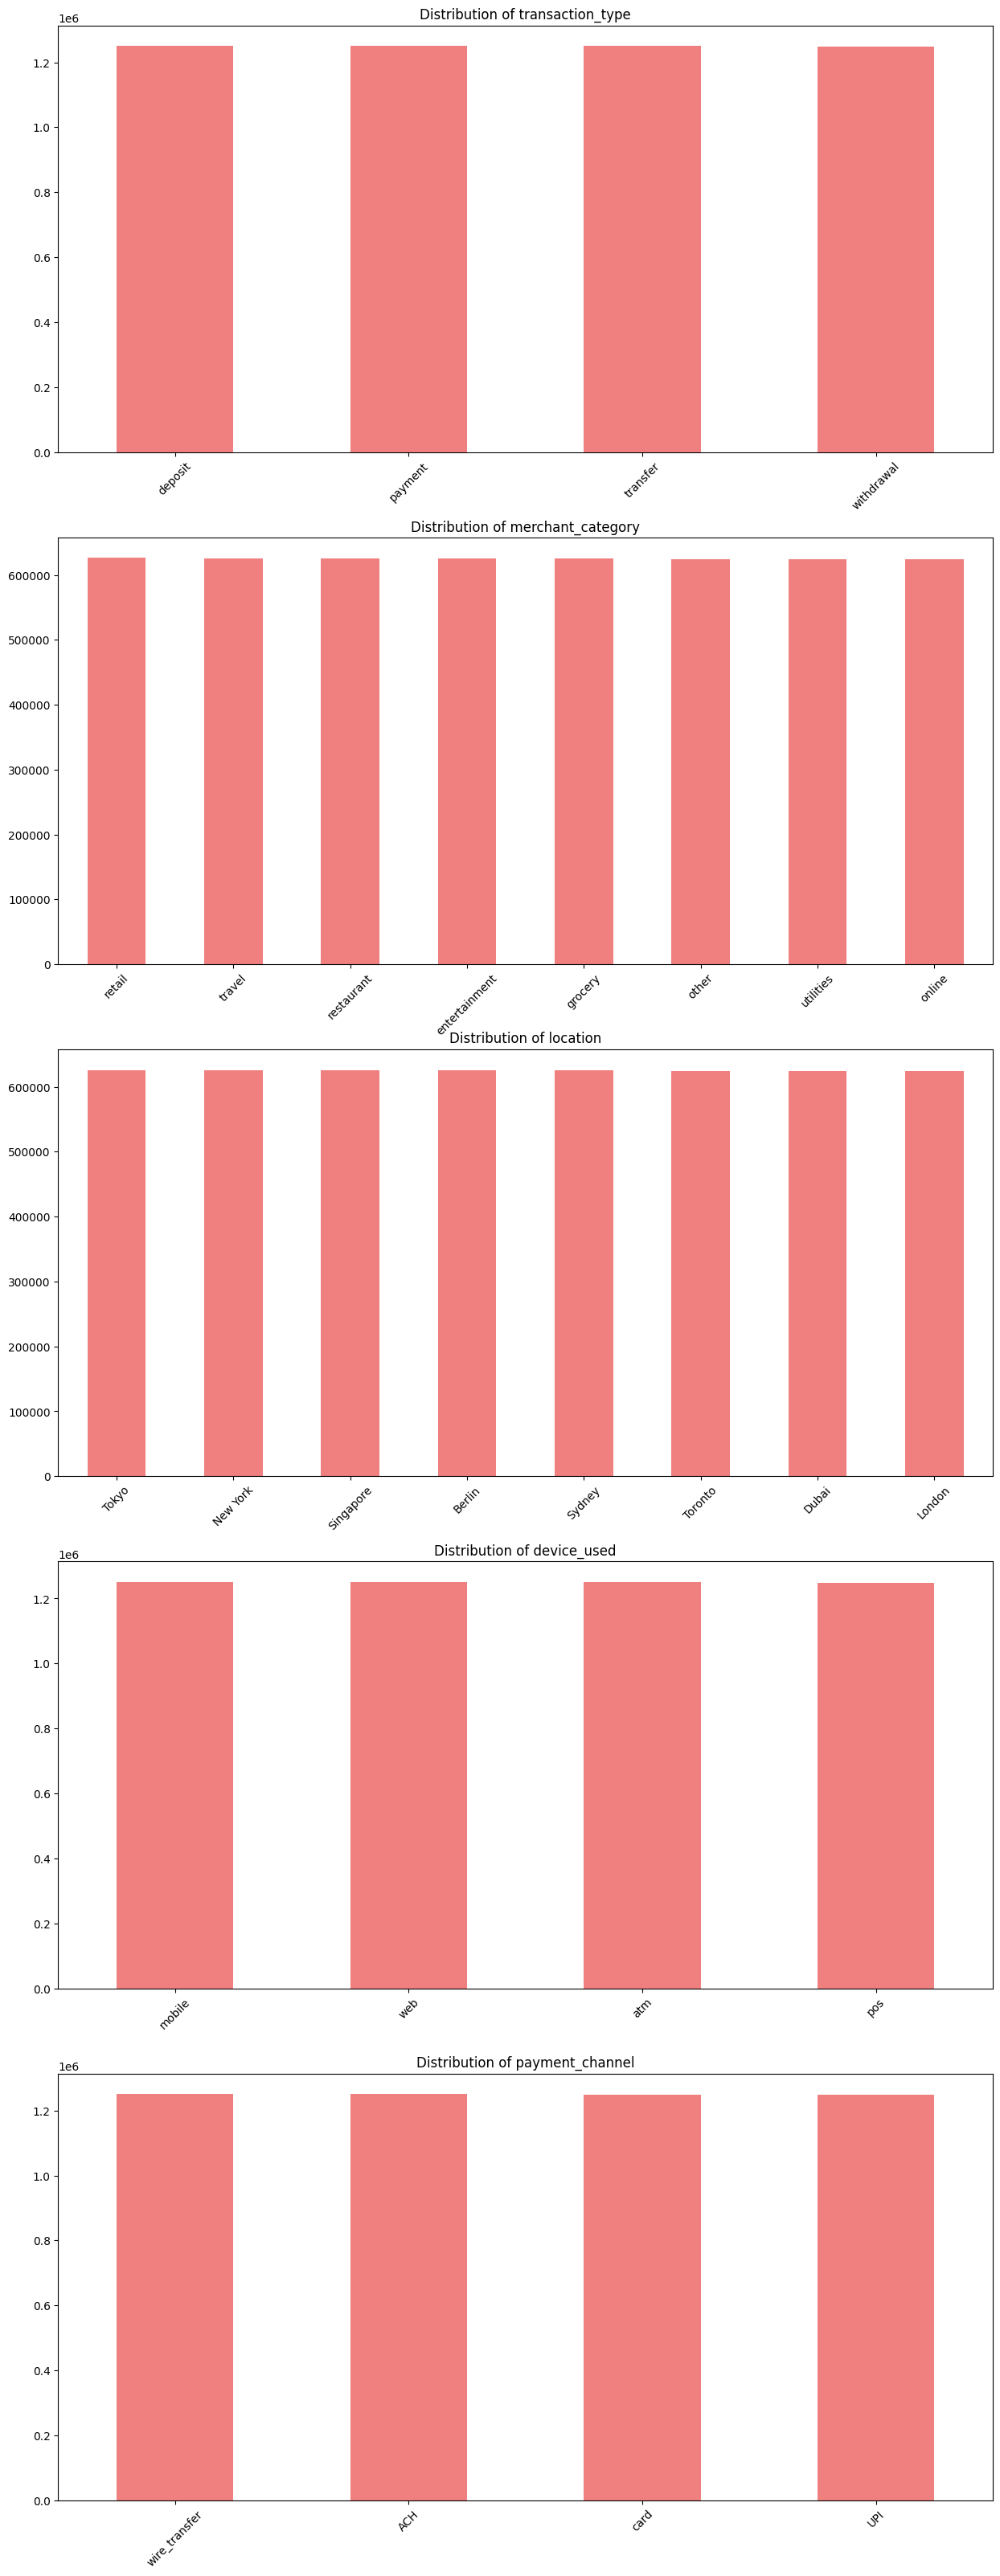

In [32]:
fig, ax = plt.subplots(5, 1, figsize=(15, 40))
ax = ax.ravel()

for i, feature in enumerate(categorical_features):
    if i < len(ax):
        df_synthetic[feature].value_counts().plot(kind='bar', ax=ax[i], color='lightcoral')
        ax[i].set_title(f'Distribution of {feature}')
        ax[i].tick_params(axis='x', rotation=45)

plt.show()

<h3 id="fraud-specific-1">1.7 Fraud-Specific Analysis</h3>

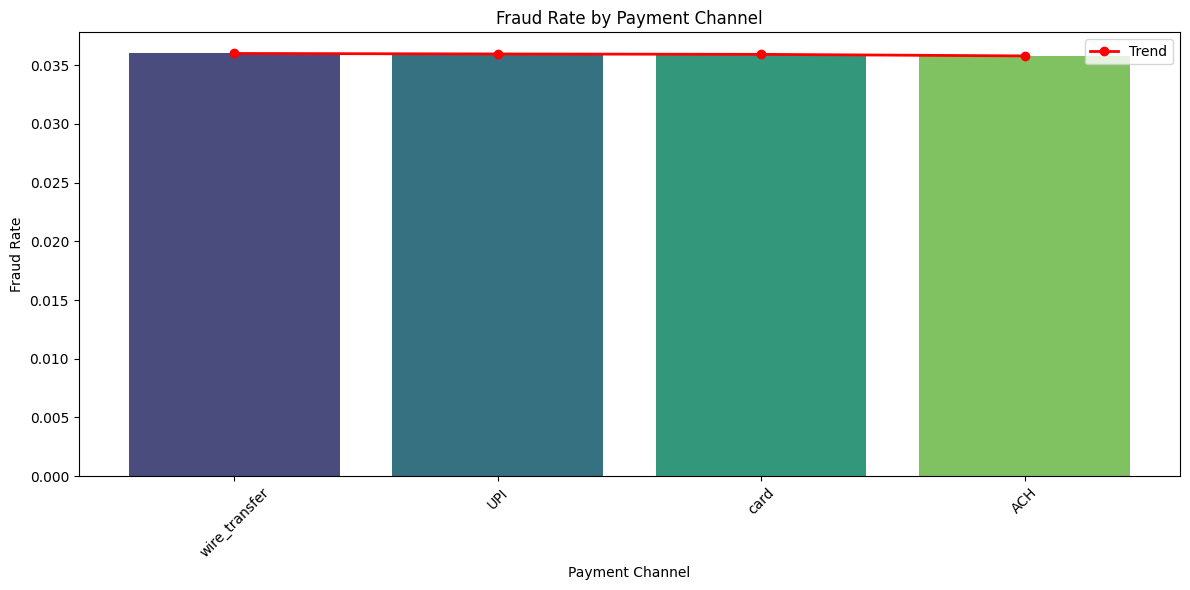

In [21]:
# by Payment Channel
plt.figure(figsize=(12, 6))
fraud_by_channel = df_synthetic.groupby('payment_channel')['is_fraud'].mean().sort_values(ascending=False)

sns.barplot(x=fraud_by_channel.index, y=fraud_by_channel.values, palette='viridis')
plt.plot(range(len(fraud_by_channel)), fraud_by_channel.values, color='red', marker='o', linewidth=2, label='Trend')
plt.title('Fraud Rate by Payment Channel')
plt.ylabel('Fraud Rate')
plt.xlabel('Payment Channel')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

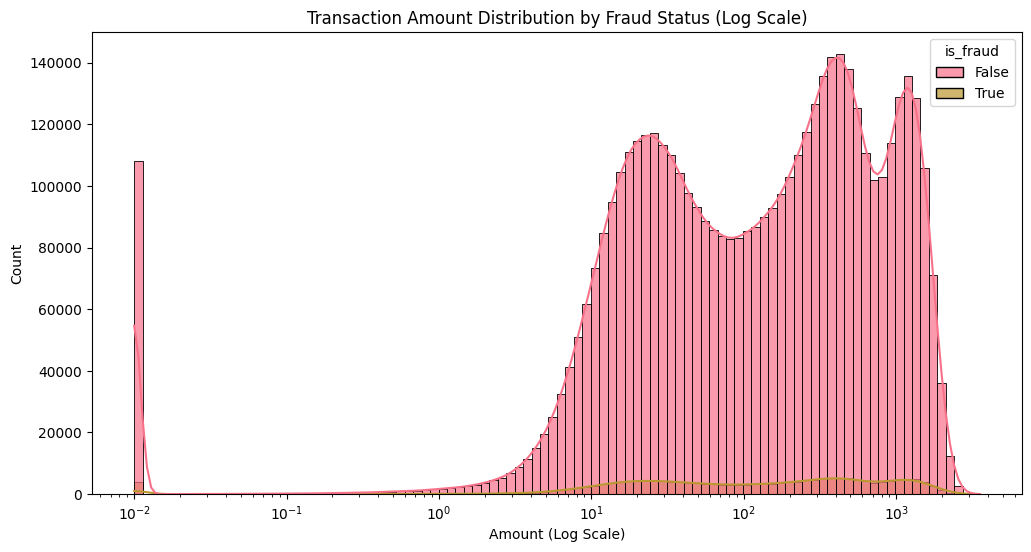

In [22]:
# by Transaction Amount
plt.figure(figsize=(12, 6))
sns.histplot(data=df_synthetic, x='amount', hue='is_fraud', bins=100, 
             log_scale=(True, False), kde=True, alpha=0.7)
plt.title('Transaction Amount Distribution by Fraud Status (Log Scale)')
plt.xlabel('Amount (Log Scale)')
plt.show()

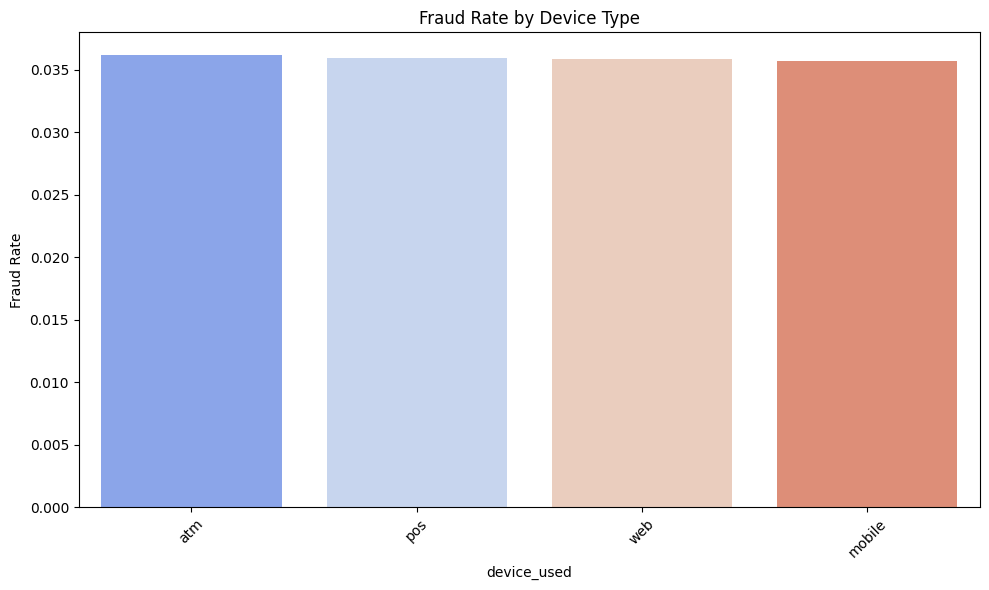

In [23]:
# by Device Usage
plt.figure(figsize=(10, 6))
fraud_by_device = df_synthetic.groupby('device_used')['is_fraud'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_device.index, y=fraud_by_device.values, palette='coolwarm')
plt.title('Fraud Rate by Device Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Wire transfers show the highest fraud rate (3.60%) while ACH has the lowest (3.58%). The minimal variation suggests limited discriminative power for fraud detection.

- The transaction amount analysis shows fraudulent transactions follow similar distribution to legitimate ones. Unlike real-world fraud, there are no distinct high-risk amount ranges evident. Both fraud and legitimate transactions span the full amount spectrum similarly.

- ATM transactions show marginally higher fraud rates (3.62%) while mobile devices have the lowest fraud rate (3.57%). There is only 0.5 percentage point difference between highest and lowest risk devices.

<h3 id="correlation-analysis-1">1.8 Correlation Analysis</h3>

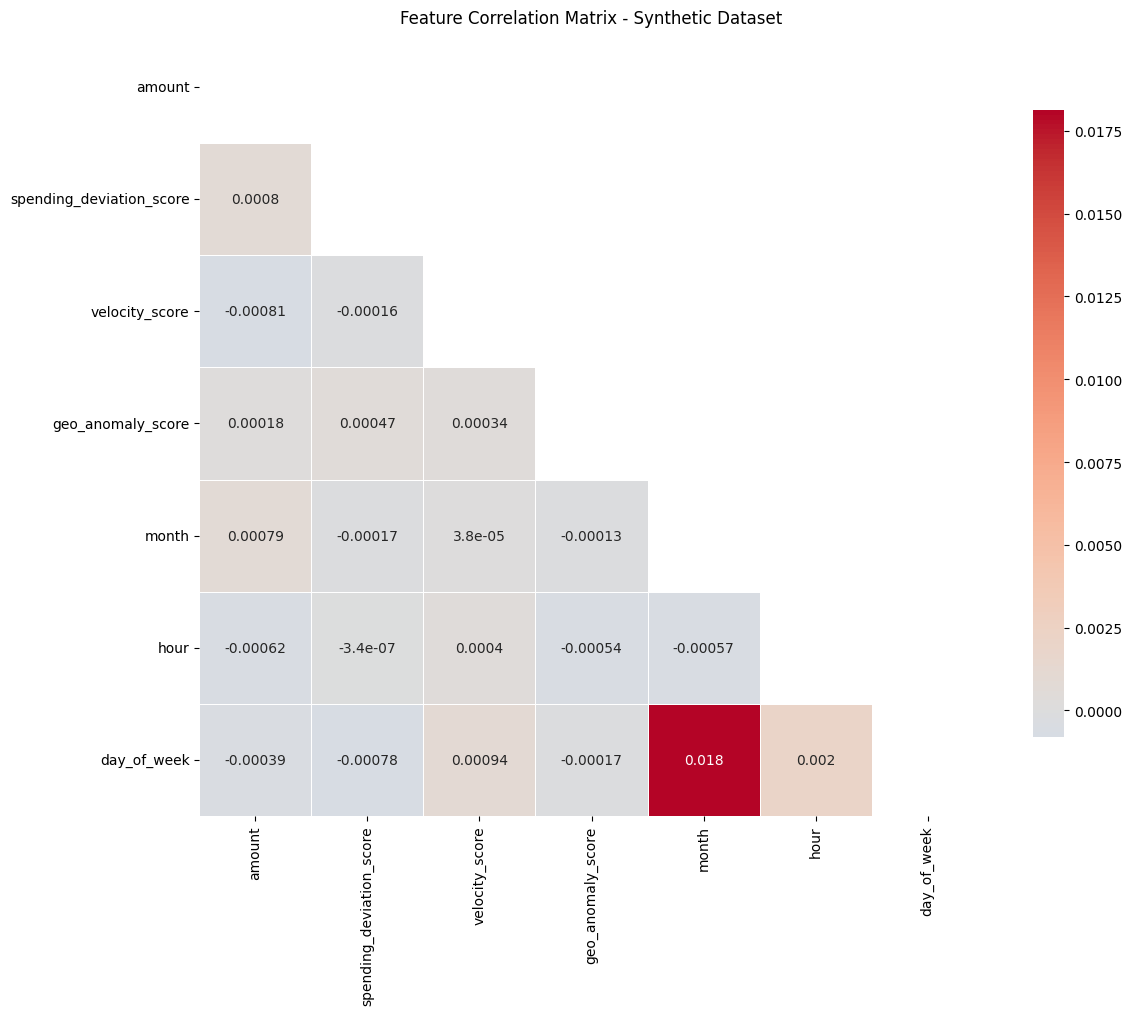

In [24]:
numeric_features = df_synthetic.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix - Synthetic Dataset')
plt.tight_layout()
plt.show()

In [ ]:
# analysing importance of features
correlations_with_fraud = {}
for feature in ['amount', 'spending_deviation_score', 'velocity_score', 'geo_anomaly_score']:
    corr, p_value = pointbiserialr(df_synthetic['is_fraud'], df_synthetic[feature])
    correlations_with_fraud[feature] = {'correlation': corr, 'p_value': p_value}

for feature, stats in correlations_with_fraud.items():
    print(f"{feature}: {stats['correlation']:.4f} (p={stats['p_value']:.2e})")

amount: -0.0002 (p=7.09e-01)
spending_deviation_score: 0.0002 (p=6.54e-01)
velocity_score: 0.0004 (p=4.08e-01)
geo_anomaly_score: 0.0003 (p=4.87e-01)


All features show extremely weak correlations with fraud:
- Amount: No correlation with fraud (-0.0002, p=0.709) - statistically insignificant
- Risk scores: All engineered features show near-zero correlations with fraud (0.0002-0.0004)
- None of the correlations are statistically significant (all p-values > 0.4)

The correlation matrix shows minimal relationships between features. 

<br/>

<h2 id="dataset-2">Dataset 2: European Credit Card Analysis</h2>

<h3 id="data-loading-2">2.1 Data Loading and Initial Exploration</h3>

In [33]:
df_european = pd.read_csv('data/creditcard_2023.csv')

In [34]:
print(f"Rows, Columns: {df_european.shape}")
df_european.head()

Rows, Columns: (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [35]:
# features and datatypes
df_european.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

<h3 id="missing-data-2">2.2 Missing Data Analysis</h3>

In [36]:
df_european.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
df_european.duplicated().sum() # number of duplicate rows

0

In [38]:
# basic statistics
df_european.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


<h3 id="class-distribution-2">2.3 Class Distribution Analysis</h3>

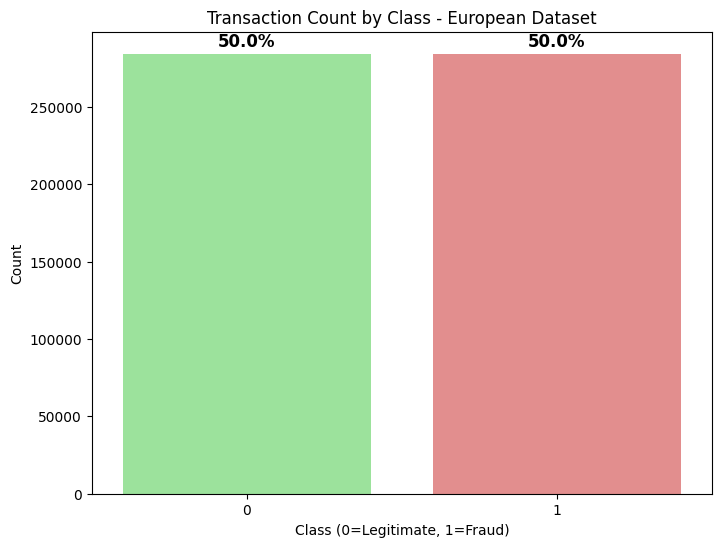

In [39]:
class_counts = df_european['Class'].value_counts()
class_percentages = df_european['Class'].value_counts(normalize=True) * 100

# count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_european, x='Class', palette=['lightgreen', 'lightcoral'])
ax.set_title('Transaction Count by Class - European Dataset')
ax.set_xlabel('Class (0=Legitimate, 1=Fraud)')
ax.set_ylabel('Count')

# add percentage labels
for i, p in enumerate(ax.patches):
    percentage = f'{class_percentages.iloc[i]:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height() + 5000),
                ha='center', fontsize=12, weight='bold')

plt.show()

- The dataset shows a perfect 50-50 split with 284,315 legitimate vs 284,315 fraudulent transactions.

<h3 id="amount-analysis-2">2.4 Amount Analysis</h3>

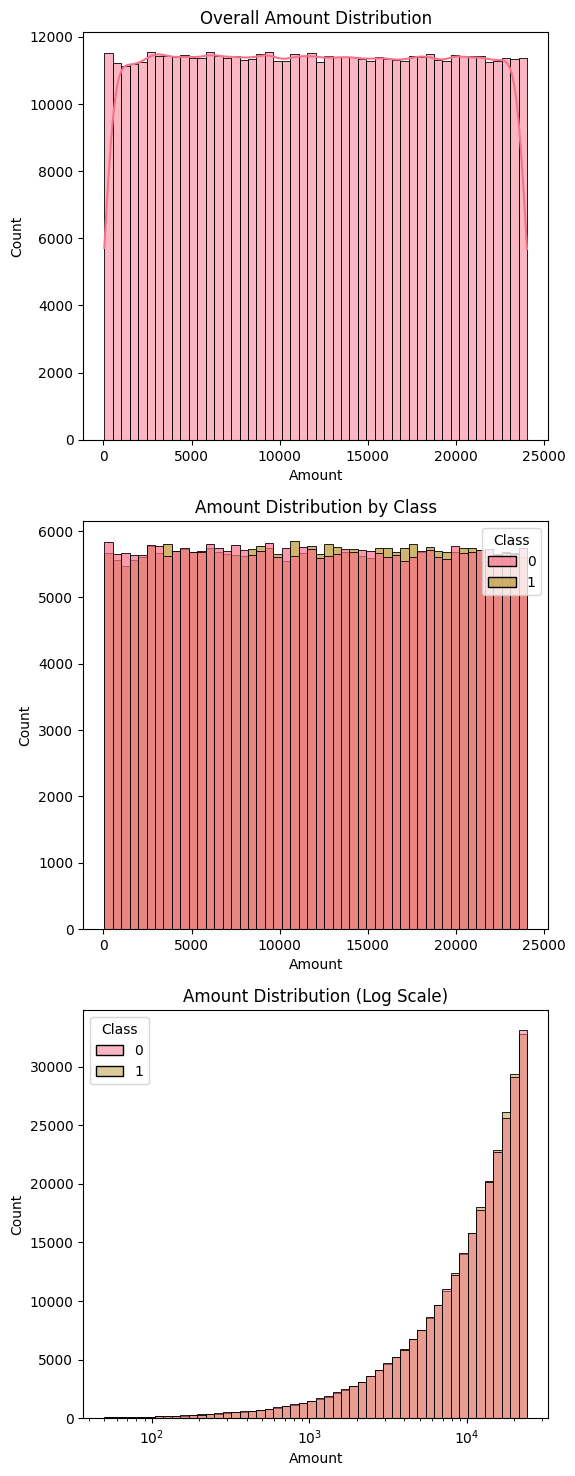

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(6, 18))

sns.histplot(data=df_european, x='Amount', bins=50, kde=True, ax=ax[0])
ax[0].set_title('Overall Amount Distribution')

sns.histplot(data=df_european, x='Amount', hue='Class', bins=50, alpha=0.7, ax=ax[1])
ax[1].set_title('Amount Distribution by Class')

sns.histplot(data=df_european[df_european['Amount'] > 0], x='Amount', 
             hue='Class', bins=50, log_scale=(True, False), ax=ax[2])
ax[2].set_title('Amount Distribution (Log Scale)')

plt.show()

In [41]:
# Amount-based fraud analysis
amount_bins = pd.cut(df_european['Amount'], 
                    bins=[0, 50, 200, 500, 1000, 30000], 
                    labels=['<€50', '€50-200', '€200-500', '€500-1000', '>€1000'])

amount_fraud_analysis = df_european.groupby(amount_bins)['Class'].agg(['count', 'sum', 'mean'])
amount_fraud_analysis['fraud_rate'] = amount_fraud_analysis['mean'] * 100
print("Fraud rates by amount ranges:")
print(amount_fraud_analysis)

Fraud rates by amount ranges:
            count     sum      mean  fraud_rate
Amount                                         
<€50            0       0       NaN         NaN
€50-200      3529    1726  0.489090   48.909039
€200-500     7260    3587  0.494077   49.407713
€500-1000   11721    5812  0.495862   49.586213
>€1000     546120  273190  0.500238   50.023804


- The amount distribution is uniform from €50 to €24,040. There is a complete absence of transactions under €50, indicating preprocessing. 

- Fraud rates are consistent across all amount ranges (48.9%-50.0%), showing no relationship between transaction size and fraud likelihood.

<h3 id="pca-distribution-2">2.5 PCA Features Distribution</h3>

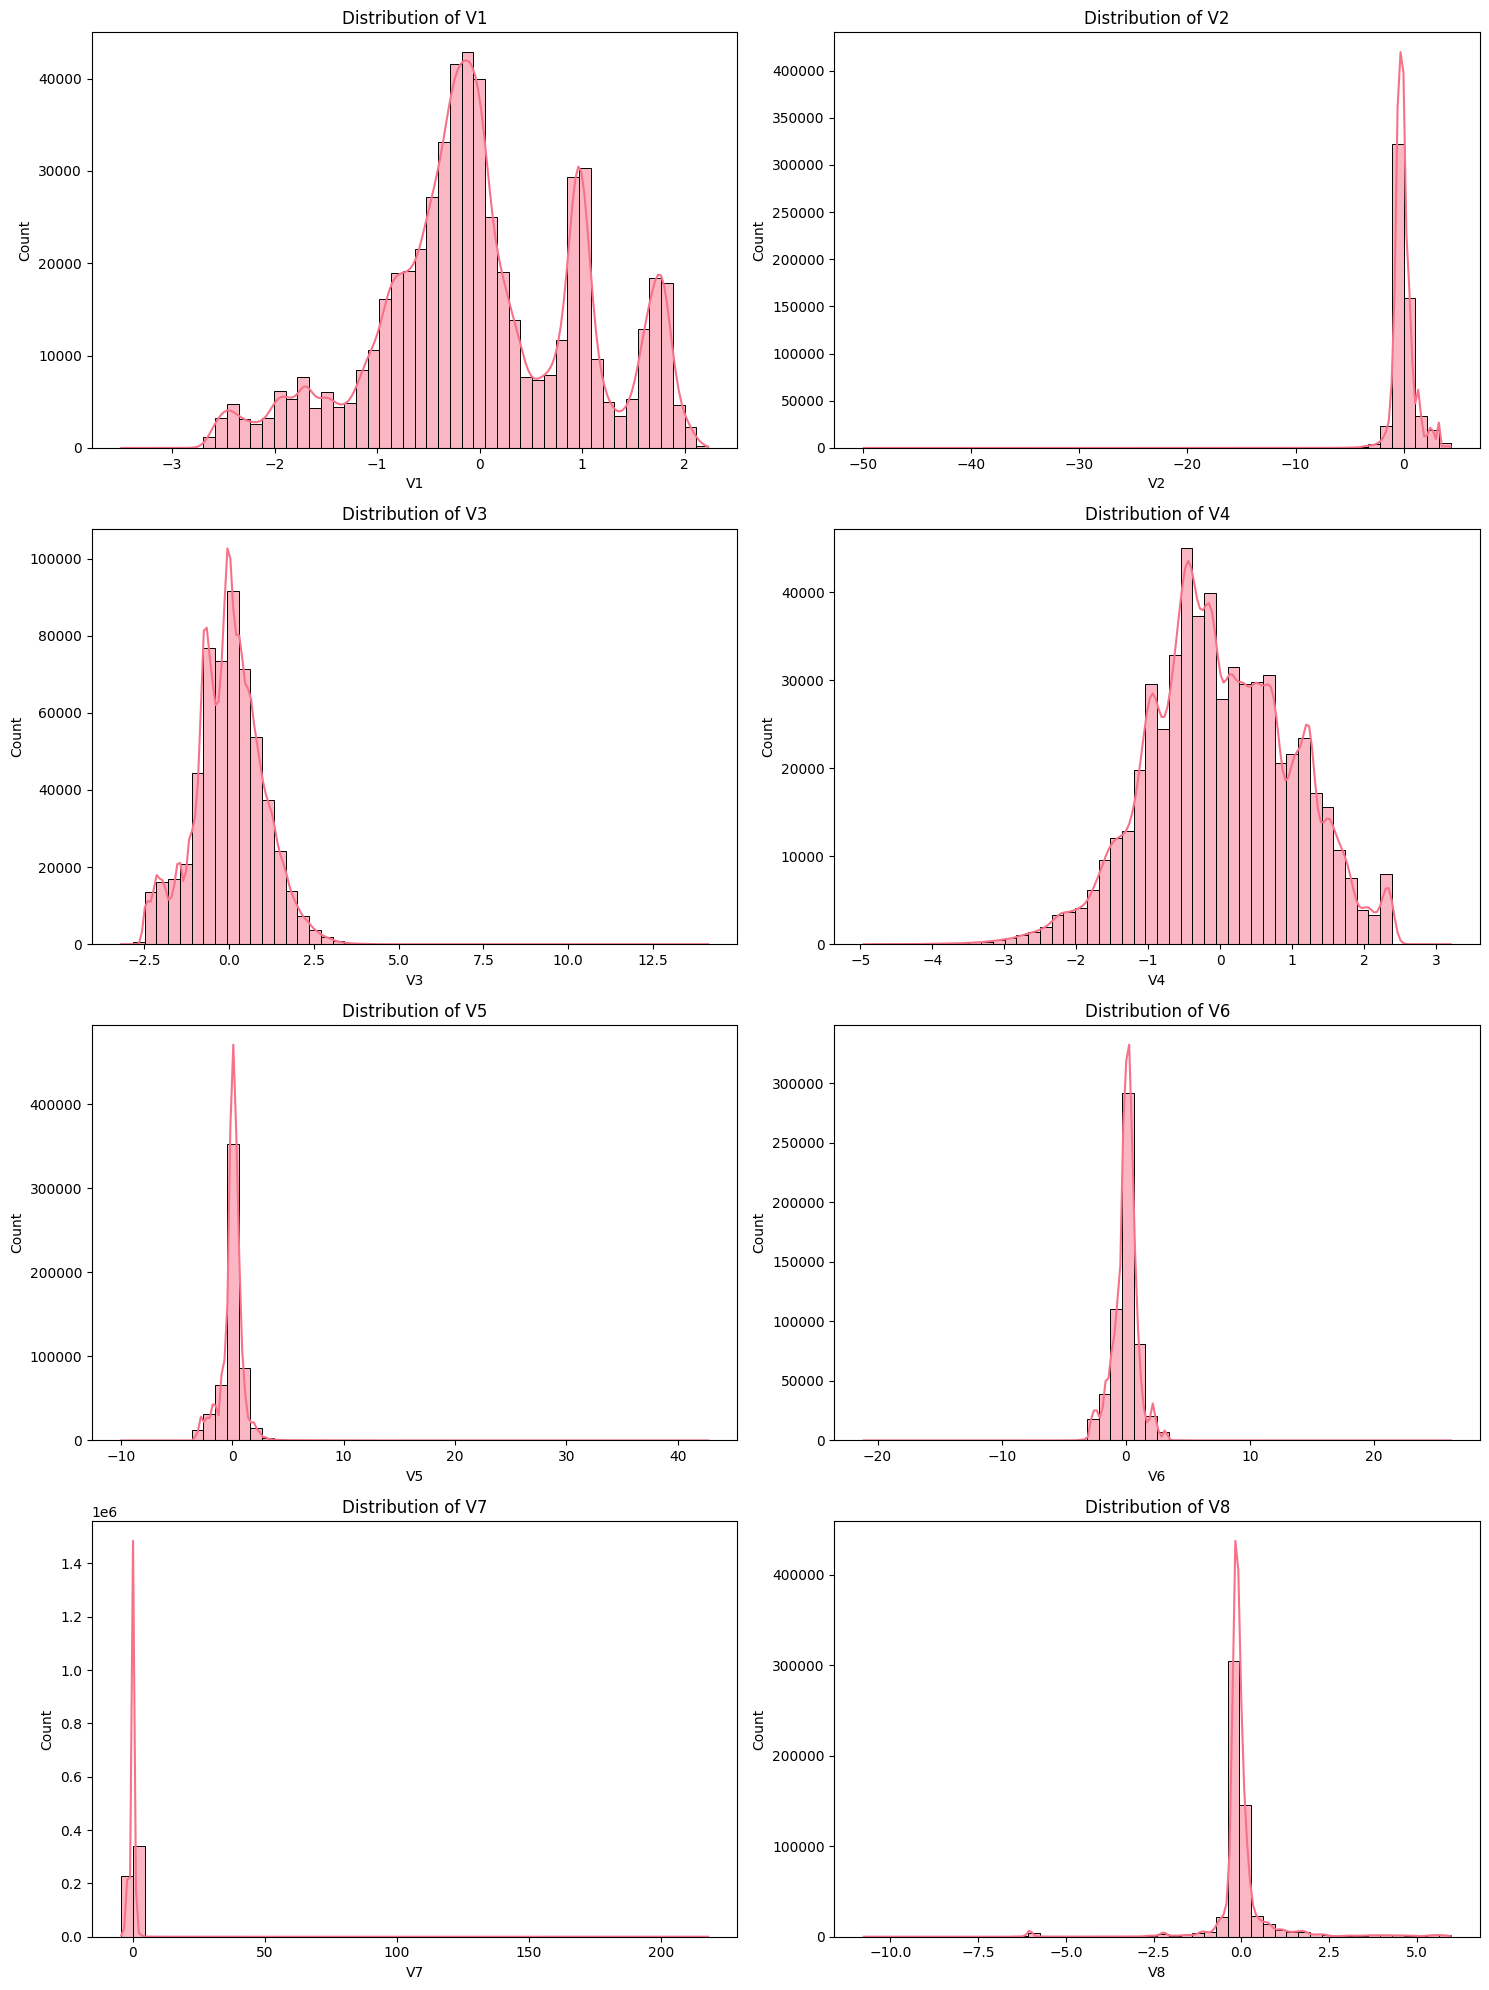

In [ ]:
# analyzing the first 8 PCA components
pca_features = [col for col in df_european.columns if col.startswith('V')]
sample_features = pca_features[:8]

fig, ax = plt.subplots(4, 2, figsize=(15, 20))
ax = ax.ravel()

for i, feature in enumerate(sample_features):
    sns.histplot(data=df_european, x=feature, bins=50, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

- All components show perfect normalization (mean=0, std=1) and capture different aspects of transaction behavior effectively.